[*********************100%***********************]  1 of 1 completed


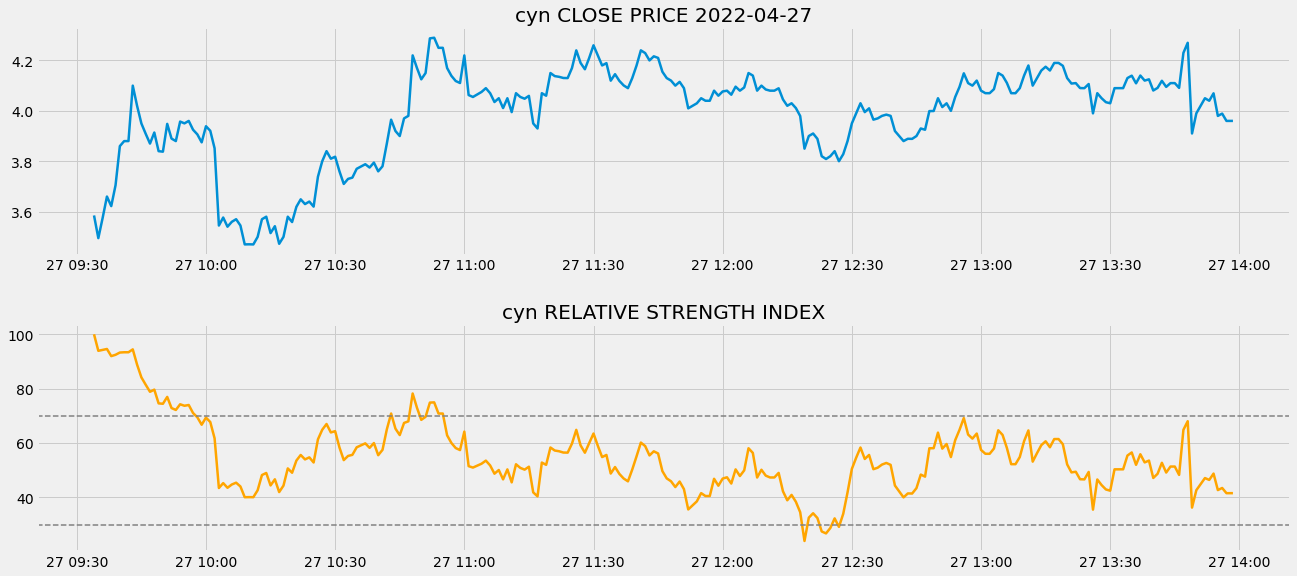

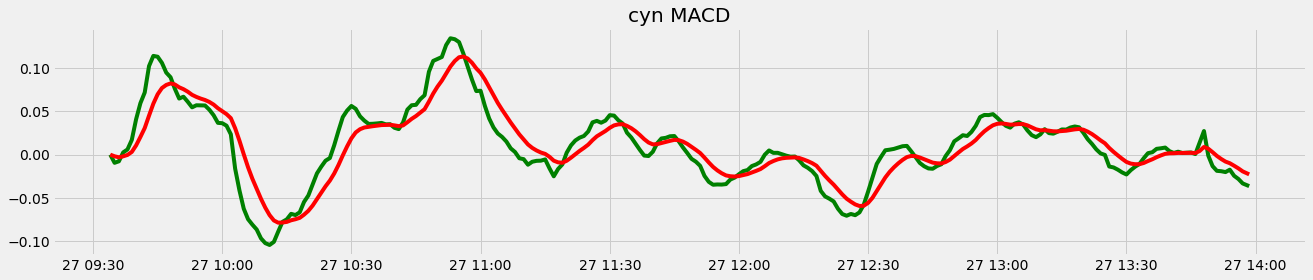

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl 
from datetime import date

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)


import yfinance as yf
#Download live data

ticker = 'cyn'
#data   = DataReader(ticker, data_source='yahoo', start='2021-01-01', end='2022-12-17')
data = yf.download(ticker,period = '1d', interval = '1m')


def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

data['rsi_14'] = get_rsi(data['Close'], 14)
data = data.dropna()
 
## Calculate the MACD and Signal Line indicators
## Calculate the Short Term Exponential Moving Average
df=data
ShortEMA = df.Close.ewm(span=9, adjust=False).mean() 
## Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=20, adjust=False).mean() 
## Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
#ax3 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

ax1.plot(data.index, data['Close'], linewidth = 2.5)

ax1.set_title(ticker+ ' CLOSE PRICE '+date.today().strftime("%Y-%m-%d"))
ax2.plot(data.index, data['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title(ticker+ ' RELATIVE STRENGTH INDEX')
plt.show()


ax3 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax3.set_title(ticker+ ' MACD')
ax3.plot(data.index, MACD, label=ticker+' MACD', color = 'green')
ax3.plot(data.index, signal, label='Signal Line', color='red')

plt.show()


#plt.show()

#plt.plot(data.index, MACD, label=ticker+' MACD', color = 'blue')
#plt.plot(data.index, signal, label='Signal Line', color='red')
#plt.xticks(rotation=45)
#plt.legend(loc='upper left')
#plt.show()